# HEALTHCARE READMISSION ANALYTICS PROJECT
Purpose: End-to-end analysis of hospital readmissions using diabetes patient data

# SECTION 1: ENVIRONMENT SETUP AND LIBRARY IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score, precision_score, recall_score, f1_score)
import warnings
import os
from datetime import datetime
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 100) 
plt.style.use('seaborn-v0_8-darkgrid')  

# Set random seed for reproducibility
np.random.seed(42)

We'll download the Diabetes 130-US Hospitals dataset from UCI ML Repository.
This dataset contains 10 years of hospital admission records for diabetes patients.
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"

# SECTION 2: GETTING THE DATA

In [2]:
df_raw = pd.read_csv("diabetic_data.csv")

In [3]:
df_raw.shape

(101766, 50)

In [4]:
df_raw.info()

<class 'pandas.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   encounter_id              101766 non-null  int64
 1   patient_nbr               101766 non-null  int64
 2   race                      101766 non-null  str  
 3   gender                    101766 non-null  str  
 4   age                       101766 non-null  str  
 5   weight                    101766 non-null  str  
 6   admission_type_id         101766 non-null  int64
 7   discharge_disposition_id  101766 non-null  int64
 8   admission_source_id       101766 non-null  int64
 9   time_in_hospital          101766 non-null  int64
 10  payer_code                101766 non-null  str  
 11  medical_specialty         101766 non-null  str  
 12  num_lab_procedures        101766 non-null  int64
 13  num_procedures            101766 non-null  int64
 14  num_medications           10176

In [5]:
df_raw.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
df_raw.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


# SECTION 3: DATA QUALITY ASSESSMENT

In [7]:
# Create a copy for preprocessing (preserve raw data)
df = df_raw.copy()

In [8]:
print("DUPLICATE RECORDS CHECK")
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates:,}")

DUPLICATE RECORDS CHECK
Total duplicate rows: 0


In [9]:
print("MISSING VALUES ANALYSIS")

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_data) > 0:
    print(f"\nColumns with missing values: {len(missing_data)}")
    print("\n" + missing_data.to_string(index=False))
else:
    print("✓ No missing values detected in the dataset!")

MISSING VALUES ANALYSIS

Columns with missing values: 2

       Column  Missing_Count  Missing_Percentage
max_glu_serum          96420               94.75
    A1Cresult          84748               83.28


In [10]:
print("PLACEHOLDER VALUES CHECK")
print("Healthcare datasets often use '?', 'Unknown', 'NA' etc. as placeholders.")
placeholders = ['?', 'Unknown', 'NA', 'None', '']
placeholder_counts = {}
for col in df.columns:
    if df[col].dtype == 'object':  # Check only text columns
        placeholder_count = df[col].isin(placeholders).sum()
        if placeholder_count > 0:
            placeholder_counts[col] = {
                'count': placeholder_count,
                'percentage': round(placeholder_count / len(df) * 100, 2)}

if placeholder_counts:
    print(f"\nColumns with placeholder values: {len(placeholder_counts)}")
    for col, stats in sorted(placeholder_counts.items(),
                             key=lambda x: x[1]['percentage'],
                             reverse=True):
        print(f"  - {col}: {stats['count']:,} ({stats['percentage']}%)")
else:
    print("\n No placeholder values found")

PLACEHOLDER VALUES CHECK
Healthcare datasets often use '?', 'Unknown', 'NA' etc. as placeholders.

 No placeholder values found


In [11]:
dtype_summary = df.dtypes.value_counts()
print(dtype_summary)

str      37
int64    13
Name: count, dtype: int64


TARGET VARIABLE ANALYSIS
Our target variable is 'readmitted' - indicating if patient was readmitted.

Readmission status distribution:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Percentages:
readmitted
NO     53.91
>30    34.93
<30    11.16
Name: count, dtype: float64


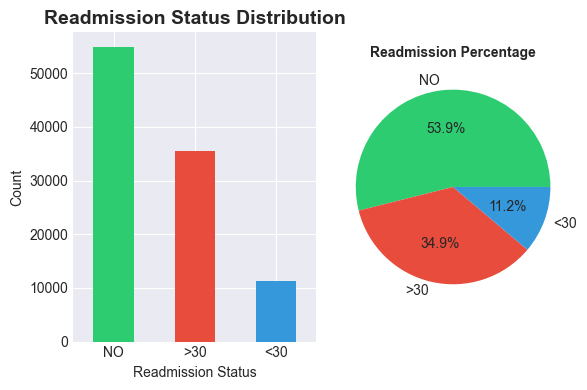

In [12]:
print("TARGET VARIABLE ANALYSIS")
print("Our target variable is 'readmitted' - indicating if patient was readmitted.")

if 'readmitted' in df.columns:
    print("\nReadmission status distribution:")
    readmit_dist = df['readmitted'].value_counts()
    print(readmit_dist)
    print("\nPercentages:")
    print((readmit_dist / len(df) * 100).round(2))
    
    # Visualize target distribution
    plt.figure(figsize=(6, 4))
    plt.subplot(1, 2, 1)
    readmit_dist.plot(kind='bar', color=['#2ecc71', '#e74c3c', '#3498db'])
    plt.title('Readmission Status Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Readmission Status')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.subplot(1, 2, 2)
    plt.pie(readmit_dist.values, labels=readmit_dist.index, autopct='%1.1f%%',colors=['#2ecc71', '#e74c3c', '#3498db'])
    plt.title('Readmission Percentage', fontsize=10, fontweight='bold')
    plt.tight_layout()
    plt.savefig('01_target_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# SECTION 4: DATA CLEANING AND PREPROCESSING

In [13]:
print("REPLACING PLACEHOLDER VALUES")
df = df.replace(placeholders, np.nan, inplace=True)
print(" Replaced all with NaN ")

REPLACING PLACEHOLDER VALUES
 Replaced all with NaN 


In [14]:
print("REMOVING PROBLEMATIC COLUMNS")
# Columns to drop (based on domain knowledge and missing data analysis)
columns_to_drop = [
    'encounter_id',  # Identifier, not predictive
    'patient_nbr',   # Identifier, not predictive
    'weight',        # 97% missing
    'payer_code',    # 40% missing, many categories
    'medical_specialty',  # 50% missing
]
print(f"Dropping {len(columns_to_drop)} columns:")
for col in columns_to_drop:
    if col in df.columns:
        missing_pct = (df[col].isnull().sum() / len(df) * 100)
        print(f"  - {col}: {missing_pct:.1f}% missing")
        df = df.drop(columns=[col])
# For race, gender, diagnosis codes: fill with 'Unknown'
categorical_fill_cols = ['race', 'gender', 'diag_1', 'diag_2', 'diag_3']
for col in categorical_fill_cols:
    if col in df.columns:
        missing_before = df[col].isnull().sum()
        df[col] = df[col].fillna('Unknown')
        print(f"  - {col}: Filled {missing_before:,} missing values with 'Unknown'")

REMOVING PROBLEMATIC COLUMNS
Dropping 5 columns:
  - encounter_id: 0.0% missing
  - patient_nbr: 0.0% missing
  - weight: 96.9% missing
  - payer_code: 39.6% missing
  - medical_specialty: 49.1% missing
  - race: Filled 2,273 missing values with 'Unknown'
  - gender: Filled 0 missing values with 'Unknown'
  - diag_1: Filled 21 missing values with 'Unknown'
  - diag_2: Filled 358 missing values with 'Unknown'
  - diag_3: Filled 1,423 missing values with 'Unknown'


In [15]:
print("CREATING BINARY TARGET VARIABLE")
if 'readmitted' in df.columns:
    # Map: '<30' -> 1 (High Risk), 'NO' and '>30' -> 0 (Low Risk)
    df['readmitted_binary'] = df['readmitted'].apply(
        lambda x: 1 if x == '<30' else 0
    )
    print("\nNew target distribution:")
    print(df['readmitted_binary'].value_counts())
    print("\nPercentages:")
    print((df['readmitted_binary'].value_counts() / len(df) * 100).round(2))
    class_counts = df['readmitted_binary'].value_counts()
    imbalance_ratio = class_counts[0] / class_counts[1]
    print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}:1")

CREATING BINARY TARGET VARIABLE

New target distribution:
readmitted_binary
0    90409
1    11357
Name: count, dtype: int64

Percentages:
readmitted_binary
0    88.84
1    11.16
Name: count, dtype: float64

Class imbalance ratio: 7.96:1


In [16]:
print("FEATURE ENGINEERING - DIAGNOSIS GROUPING")
print("ICD-9 diagnosis codes can be grouped into clinically meaningful categories")

def categorize_diagnosis(diag_code):
    if pd.isna(diag_code) or diag_code == 'Unknown':
        return 'Unknown'
    diag_str = str(diag_code)
    try:
        if diag_str.startswith('V') or diag_str.startswith('E'):
            return 'Other'
        code = float(diag_str)
        if 390 <= code <= 459 or code == 785:
            return 'Circulatory'
        elif 460 <= code <= 519 or code == 786:
            return 'Respiratory'
        elif 520 <= code <= 579 or code == 787:
            return 'Digestive'
        elif 250 <= code < 251:
            return 'Diabetes'
        elif 800 <= code <= 999:
            return 'Injury'
        elif 710 <= code <= 739:
            return 'Musculoskeletal'
        elif 580 <= code <= 629 or code == 788:
            return 'Genitourinary'
        elif 140 <= code <= 239:
            return 'Neoplasms'
        else:
            return 'Other'
    except:
        return 'Other'
for diag_col in ['diag_1', 'diag_2', 'diag_3']:
    if diag_col in df.columns:
        new_col_name = f'{diag_col}_category'
        df[new_col_name] = df[diag_col].apply(categorize_diagnosis)
        print(f"\nCreated {new_col_name}")
        print(f"\nCategories: {df[new_col_name].value_counts().to_dict()}")

FEATURE ENGINEERING - DIAGNOSIS GROUPING
ICD-9 diagnosis codes can be grouped into clinically meaningful categories

Created diag_1_category

Categories: {'Circulatory': 30437, 'Other': 18172, 'Respiratory': 14423, 'Digestive': 9475, 'Diabetes': 8757, 'Injury': 6974, 'Genitourinary': 5117, 'Musculoskeletal': 4957, 'Neoplasms': 3433, 'Unknown': 21}

Created diag_2_category

Categories: {'Circulatory': 31881, 'Other': 26553, 'Diabetes': 12794, 'Respiratory': 10895, 'Genitourinary': 8376, 'Digestive': 4170, 'Neoplasms': 2547, 'Injury': 2428, 'Musculoskeletal': 1764, 'Unknown': 358}

Created diag_3_category

Categories: {'Circulatory': 30306, 'Other': 29195, 'Diabetes': 17157, 'Respiratory': 7358, 'Genitourinary': 6680, 'Digestive': 3930, 'Injury': 1946, 'Musculoskeletal': 1915, 'Neoplasms': 1856, 'Unknown': 1423}


In [17]:
# Convert age to numeric (currently in brackets like '[0-10)')
print("CONVERTING AGE TO NUMERIC")
if 'age' in df.columns:
    age_mapping = {
        '[0-10)': 5,
        '[10-20)': 15,
        '[20-30)': 25,
        '[30-40)': 35,
        '[40-50)': 45,
        '[50-60)': 55,
        '[60-70)': 65,
        '[70-80)': 75,
        '[80-90)': 85,
        '[90-100)': 95
    }
    df['age_numeric'] = df['age'].map(age_mapping)
    print(f"Created 'age_numeric' column")
    print(f"Range: {df['age_numeric'].min()} - {df['age_numeric'].max()} years")

CONVERTING AGE TO NUMERIC
Created 'age_numeric' column
Range: 5 - 95 years


In [18]:
print(f"Final dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Final dataset shape: 101,766 rows × 50 columns


In [19]:
output_file = 'diabetic_data_cleaned.csv'
df.to_csv(output_file, index=False)

# SECTION 5: CLEANED DATA SUMMARY

In [20]:
print("NUMERIC FEATURES SUMMARY")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Number of numeric features: {len(numeric_cols)}")
print("Key numeric features:")
key_numeric = ['time_in_hospital', 'num_lab_procedures', 'num_procedures','num_medications', 'number_outpatient', 'number_emergency',
               'number_inpatient', 'number_diagnoses', 'age_numeric']
for col in key_numeric:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Mean: {df[col].mean():.2f}")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Std Dev: {df[col].std():.2f}")
        print(f"  Range: [{df[col].min()}, {df[col].max()}]")

NUMERIC FEATURES SUMMARY
Number of numeric features: 13
Key numeric features:

time_in_hospital:
  Mean: 4.40
  Median: 4.00
  Std Dev: 2.99
  Range: [1, 14]

num_lab_procedures:
  Mean: 43.10
  Median: 44.00
  Std Dev: 19.67
  Range: [1, 132]

num_procedures:
  Mean: 1.34
  Median: 1.00
  Std Dev: 1.71
  Range: [0, 6]

num_medications:
  Mean: 16.02
  Median: 15.00
  Std Dev: 8.13
  Range: [1, 81]

number_outpatient:
  Mean: 0.37
  Median: 0.00
  Std Dev: 1.27
  Range: [0, 42]

number_emergency:
  Mean: 0.20
  Median: 0.00
  Std Dev: 0.93
  Range: [0, 76]

number_inpatient:
  Mean: 0.64
  Median: 0.00
  Std Dev: 1.26
  Range: [0, 21]

number_diagnoses:
  Mean: 7.42
  Median: 8.00
  Std Dev: 1.93
  Range: [1, 16]

age_numeric:
  Mean: 65.97
  Median: 65.00
  Std Dev: 15.94
  Range: [5, 95]


In [21]:
print("CATEGORICAL FEATURES SUMMARY")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Number of categorical features: {len(categorical_cols)}")
print("Key categorical features and their unique values:")
key_categorical = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id','admission_source_id', 'diag_1_category', 'diabetesMed', 'change']

for col in key_categorical:
    if col in df.columns:
        unique_count = df[col].nunique()
        print(f"\n{col}: {unique_count} unique values")
        if unique_count <= 10:  
            print(df[col].value_counts().head())

CATEGORICAL FEATURES SUMMARY
Number of categorical features: 37
Key categorical features and their unique values:

race: 6 unique values
race
Caucasian          76099
AfricanAmerican    19210
Unknown             2273
Hispanic            2037
Other               1506
Name: count, dtype: int64

gender: 3 unique values
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

admission_type_id: 8 unique values
admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
Name: count, dtype: int64

discharge_disposition_id: 26 unique values

admission_source_id: 17 unique values

diag_1_category: 10 unique values
diag_1_category
Circulatory    30437
Other          18172
Respiratory    14423
Digestive       9475
Diabetes        8757
Name: count, dtype: int64

diabetesMed: 2 unique values
diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64

change: 2 unique values
change
No    54755
Ch    47011
Name: count, dtype: int6

In [22]:
print("FINAL DATA QUALITY CHECK")
print(f"Total records: {len(df):,}")
print(f"Total features: {df.shape[1]}")
print(f"\nMissing values remaining:")
remaining_missing = df.isnull().sum().sum()
print(f"  Total: {remaining_missing:,}")

if remaining_missing > 0:
    print(f"  Percentage: {remaining_missing / (df.shape[0] * df.shape[1]) * 100:.4f}%")
else:
    print("   No missing values!")

FINAL DATA QUALITY CHECK
Total records: 101,766
Total features: 50

Missing values remaining:
  Total: 181,168
  Percentage: 3.5605%


In [23]:
missing_per_column = df.isnull().sum()
print(missing_per_column[missing_per_column > 0])

max_glu_serum    96420
A1Cresult        84748
dtype: int64


In [ ]:
# these missing values are kept

# SECTION 6: EXPLORATORY DATA ANALYSIS (EDA)

In [24]:
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

In [25]:
# UNIVARIATE ANALYSIS - NUMERIC FEATURES

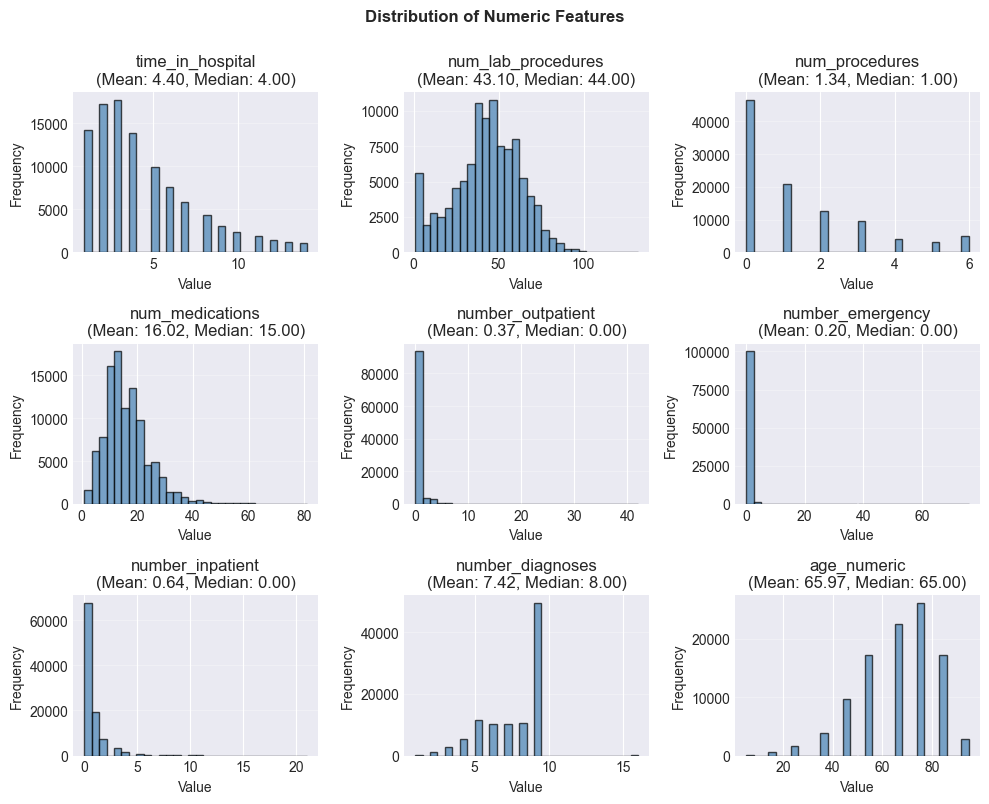

In [26]:
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures','num_medications', 'number_outpatient', 'number_emergency',
                   'number_inpatient', 'number_diagnoses', 'age_numeric']
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle('Distribution of Numeric Features', fontsize=12, fontweight='bold', y=1.00)
for idx, col in enumerate(numeric_features):
    if col in df.columns:
        row = idx // 3
        col_idx = idx % 3
        ax = axes[row, col_idx]
        df[col].hist(bins=30, ax=ax, alpha=0.7, color='steelblue', edgecolor='black')
        ax.set_title(f'{col}\n(Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f})', fontsize=12)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('visualizations/02_numeric_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
#UNIVARIATE ANALYSIS - CATEGORICAL FEATURES

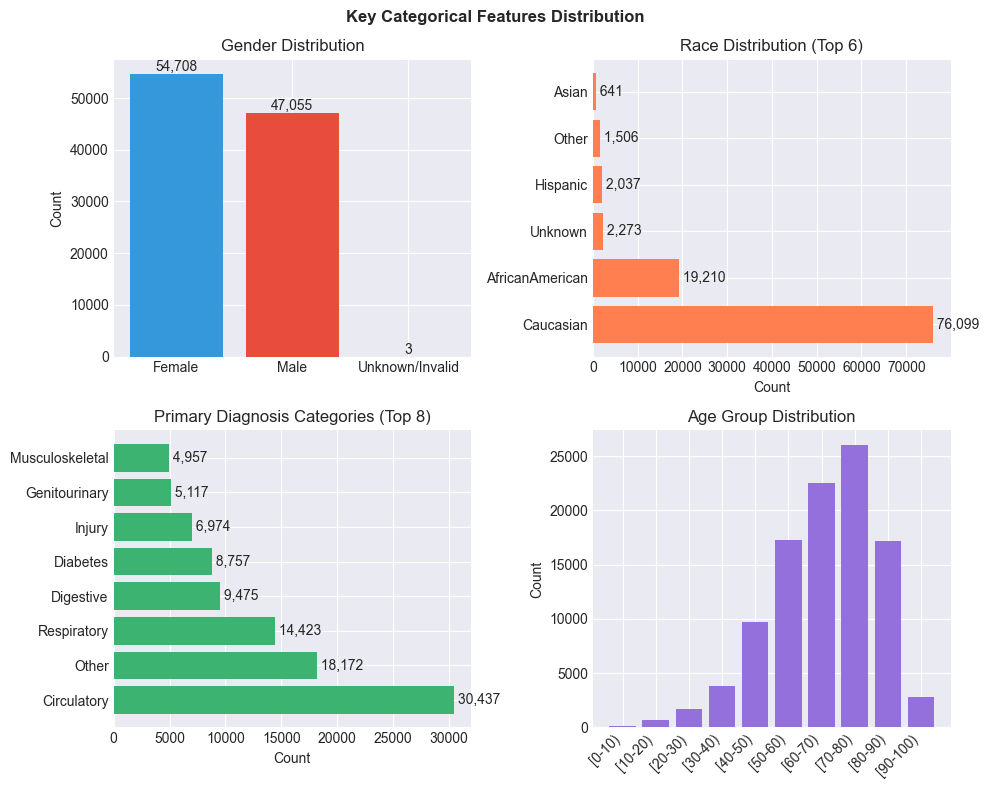

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Key Categorical Features Distribution', fontsize=12, fontweight='bold')

if 'gender' in df.columns:
    gender_counts = df['gender'].value_counts()
    axes[0, 0].bar(gender_counts.index, gender_counts.values, color=['#3498db', '#e74c3c', '#95a5a6'])
    axes[0, 0].set_title('Gender Distribution')
    axes[0, 0].set_ylabel('Count')
    for i, v in enumerate(gender_counts.values):
        axes[0, 0].text(i, v, f'{v:,}', ha='center', va='bottom')
if 'race' in df.columns:
    race_counts = df['race'].value_counts().head(6)
    axes[0, 1].barh(race_counts.index, race_counts.values, color='coral')
    axes[0, 1].set_title('Race Distribution (Top 6)')
    axes[0, 1].set_xlabel('Count')
    for i, v in enumerate(race_counts.values):
        axes[0, 1].text(v, i, f' {v:,}', va='center')
if 'diag_1_category' in df.columns:
    diag_counts = df['diag_1_category'].value_counts().head(8)
    axes[1, 0].barh(diag_counts.index, diag_counts.values, color='mediumseagreen')
    axes[1, 0].set_title('Primary Diagnosis Categories (Top 8)')
    axes[1, 0].set_xlabel('Count')
    for i, v in enumerate(diag_counts.values):
        axes[1, 0].text(v, i, f' {v:,}', va='center')
if 'age' in df.columns:
    age_counts = df['age'].value_counts().sort_index()
    axes[1, 1].bar(range(len(age_counts)), age_counts.values, color='mediumpurple')
    axes[1, 1].set_title('Age Group Distribution')
    axes[1, 1].set_xticks(range(len(age_counts)))
    axes[1, 1].set_xticklabels(age_counts.index, rotation=45, ha='right')
    axes[1, 1].set_ylabel('Count')
plt.tight_layout()
plt.savefig('visualizations/03_categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# BIVARIATE ANALYSIS - FEATURES VS TARGET

Analyzing numeric features by readmission status


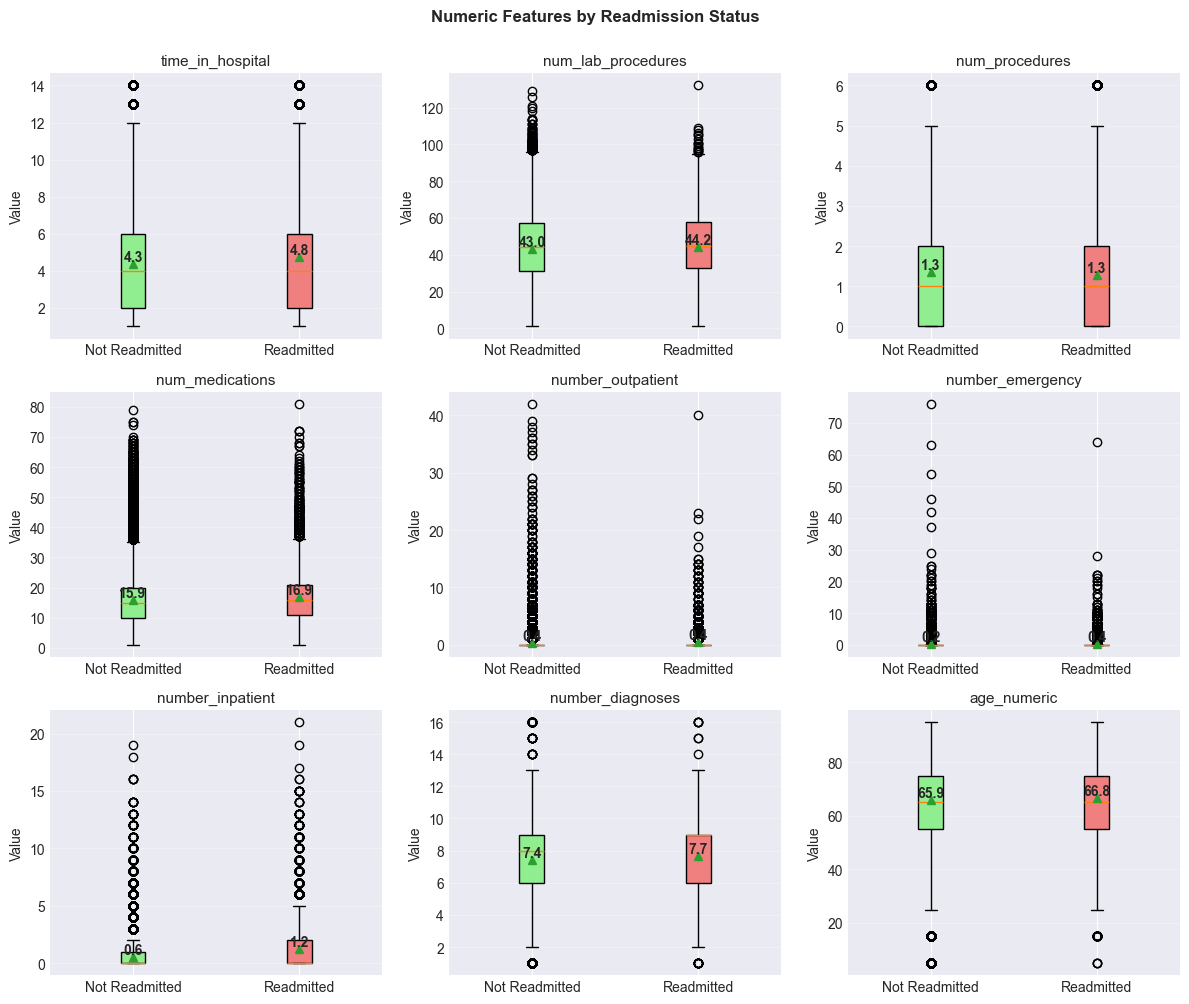

In [30]:
print("Analyzing numeric features by readmission status")
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle('Numeric Features by Readmission Status', fontsize=12, fontweight='bold', y=1.00)

for idx, col in enumerate(numeric_features):
    if col in df.columns:
        row = idx // 3
        col_idx = idx % 3
        ax = axes[row, col_idx]
        data_to_plot = [
            df[df['readmitted_binary'] == 0][col].dropna(),
            df[df['readmitted_binary'] == 1][col].dropna()
        ]
        bp = ax.boxplot(data_to_plot, labels=['Not Readmitted', 'Readmitted'], patch_artist=True, showmeans=True)
        bp['boxes'][0].set_facecolor('lightgreen')
        bp['boxes'][1].set_facecolor('lightcoral')
        ax.set_title(f'{col}', fontsize=11)
        ax.set_ylabel('Value')
        ax.grid(axis='y', alpha=0.3)
        mean_0 = df[df['readmitted_binary'] == 0][col].mean()
        mean_1 = df[df['readmitted_binary'] == 1][col].mean()
        ax.text(1, mean_0, f'{mean_0:.1f}', ha='center', va='bottom', fontweight='bold')
        ax.text(2, mean_1, f'{mean_1:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('visualizations/04_numeric_vs_readmission.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
print("Mean Differences Between Readmitted and Not Readmitted Patients:")
for col in numeric_features:
    if col in df.columns:
        mean_not_readmit = df[df['readmitted_binary'] == 0][col].mean()
        mean_readmit = df[df['readmitted_binary'] == 1][col].mean()
        diff = mean_readmit - mean_not_readmit
        pct_diff = (diff / mean_not_readmit * 100) if mean_not_readmit != 0 else 0
        print(f"{col}:")
        print(f"  Not Readmitted: {mean_not_readmit:.2f}")
        print(f"  Readmitted: {mean_readmit:.2f}")
        print(f"  Difference: {diff:+.2f} ({pct_diff:+.1f}%)")
        print()

Mean Differences Between Readmitted and Not Readmitted Patients:
time_in_hospital:
  Not Readmitted: 4.35
  Readmitted: 4.77
  Difference: +0.42 (+9.6%)

num_lab_procedures:
  Not Readmitted: 42.95
  Readmitted: 44.23
  Difference: +1.27 (+3.0%)

num_procedures:
  Not Readmitted: 1.35
  Readmitted: 1.28
  Difference: -0.07 (-4.9%)

num_medications:
  Not Readmitted: 15.91
  Readmitted: 16.90
  Difference: +0.99 (+6.2%)

number_outpatient:
  Not Readmitted: 0.36
  Readmitted: 0.44
  Difference: +0.08 (+21.1%)

number_emergency:
  Not Readmitted: 0.18
  Readmitted: 0.36
  Difference: +0.18 (+101.0%)

number_inpatient:
  Not Readmitted: 0.56
  Readmitted: 1.22
  Difference: +0.66 (+117.9%)

number_diagnoses:
  Not Readmitted: 7.39
  Readmitted: 7.69
  Difference: +0.30 (+4.1%)

age_numeric:
  Not Readmitted: 65.87
  Readmitted: 66.76
  Difference: +0.89 (+1.4%)



CATEGORICAL FEATURES VS READMISSION


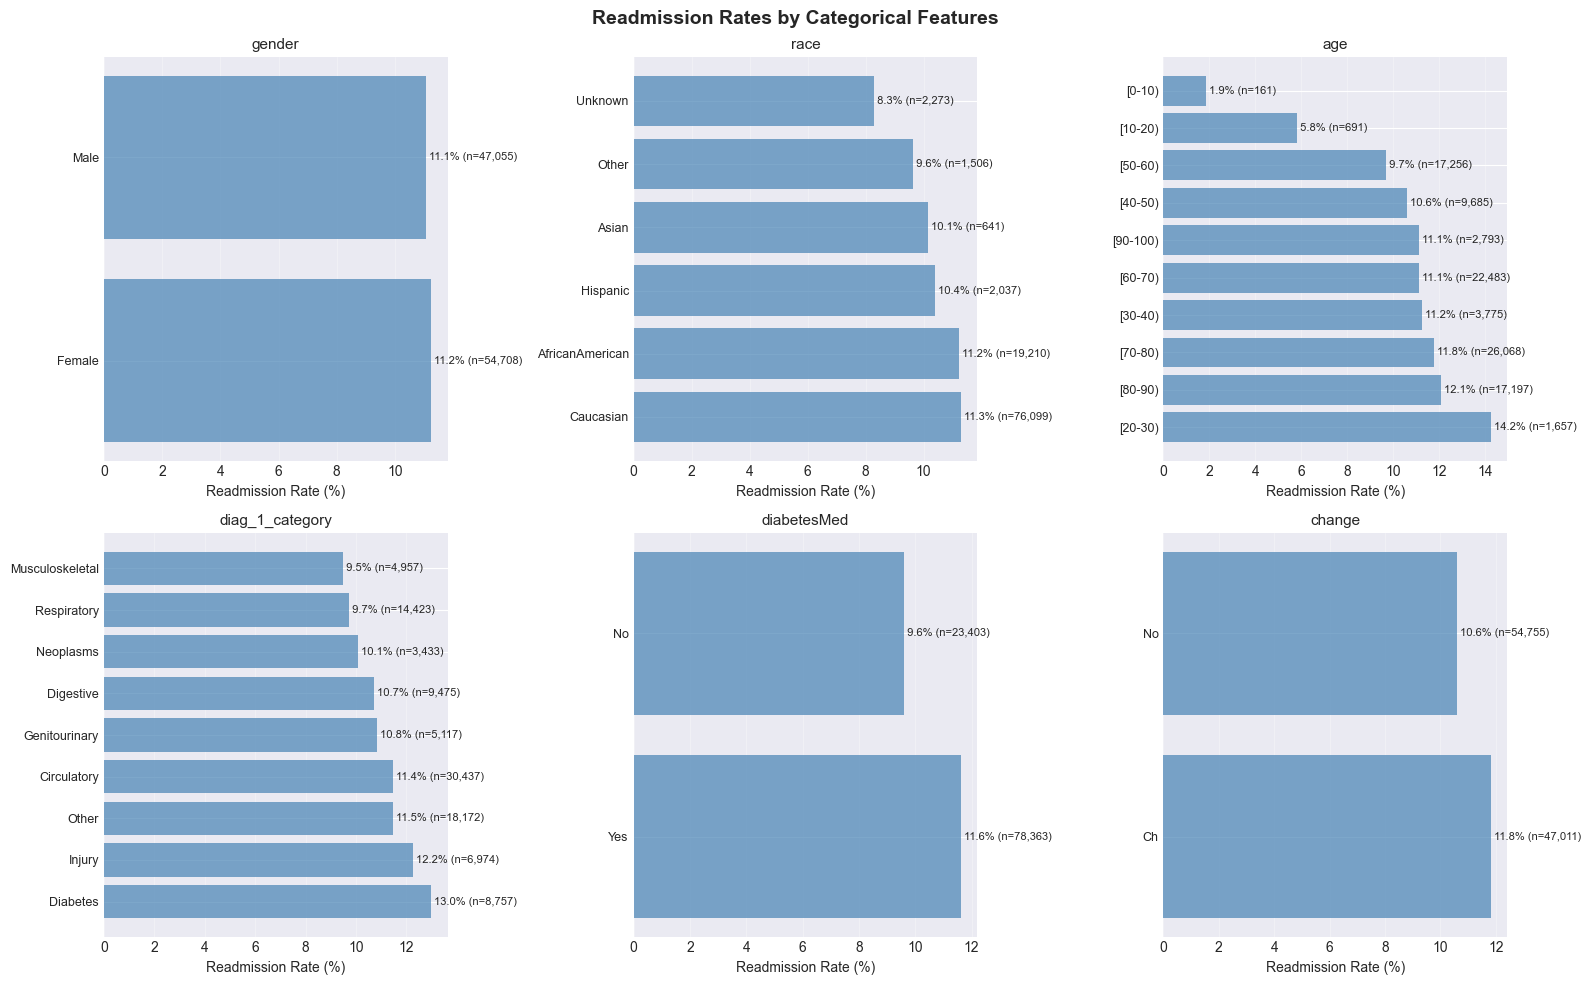

In [32]:
print("CATEGORICAL FEATURES VS READMISSION")
categorical_features = ['gender', 'race', 'age', 'diag_1_category', 'diabetesMed', 'change']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Readmission Rates by Categorical Features', fontsize=14, fontweight='bold')

for idx, col in enumerate(categorical_features):
    if col in df.columns:
        row = idx // 3
        col_idx = idx % 3
        ax = axes[row, col_idx]
        readmit_rate = df.groupby(col)['readmitted_binary'].agg(['mean', 'count'])
        readmit_rate = readmit_rate[readmit_rate['count'] >= 100]  # Filter low-count categories
        readmit_rate = readmit_rate.sort_values('mean', ascending=False).head(10)
        bars = ax.barh(range(len(readmit_rate)), readmit_rate['mean'] * 100, color='steelblue', alpha=0.7)
        ax.set_yticks(range(len(readmit_rate)))
        ax.set_yticklabels(readmit_rate.index, fontsize=9)
        ax.set_xlabel('Readmission Rate (%)', fontsize=10)
        ax.set_title(f'{col}', fontsize=11)
        ax.grid(axis='x', alpha=0.3)
        for i, (rate, count) in enumerate(zip(readmit_rate['mean'], readmit_rate['count'])):
            ax.text(rate * 100, i, f' {rate*100:.1f}% (n={count:,})', va='center', fontsize=8)

plt.tight_layout()
plt.savefig('visualizations/05_categorical_vs_readmission.png', dpi=300, bbox_inches='tight')
plt.show()

CORRELATION ANALYSIS


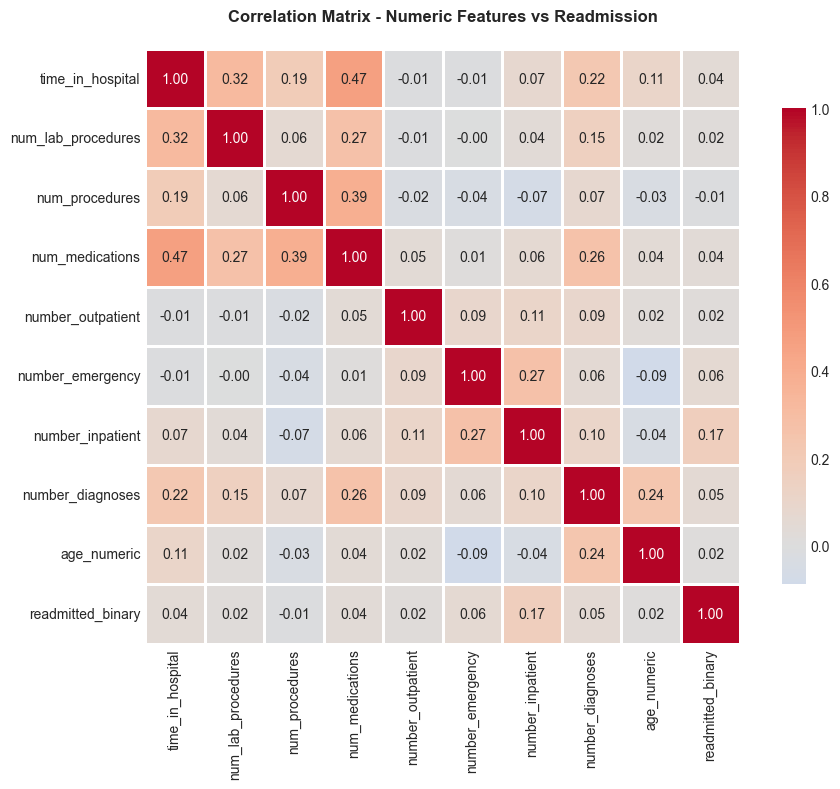

In [33]:
print("CORRELATION ANALYSIS")
corr_columns = [col for col in numeric_features if col in df.columns]
corr_columns.append('readmitted_binary')
correlation_matrix = df[corr_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numeric Features vs Readmission', fontsize=12, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('visualizations/06_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
print("Top Correlations with Readmission:")
target_corr = correlation_matrix['readmitted_binary'].drop('readmitted_binary').sort_values(key=abs, ascending=False)
print(target_corr.to_string())

Top Correlations with Readmission:
number_inpatient      0.165147
number_emergency      0.060747
number_diagnoses      0.049524
time_in_hospital      0.044199
num_medications       0.038432
num_lab_procedures    0.020364
number_outpatient     0.018893
age_numeric           0.017634
num_procedures       -0.012227


# SECTION 7: KEY INSIGHTS FROM EDA

In [35]:
print("PATIENT DEMOGRAPHICS")
if 'gender' in df.columns:
    gender_dist = df['gender'].value_counts(normalize=True) * 100
    print(f"Gender Distribution:")
    for gender, pct in gender_dist.items():
        print(f"  - {gender}: {pct:.1f}%")
if 'age_numeric' in df.columns:
    print(f"\nAge Statistics:")
    print(f"  - Mean Age: {df['age_numeric'].mean():.1f} years")
    print(f"  - Median Age: {df['age_numeric'].median():.1f} years")
    print(f"  - Patients over 60: {(df['age_numeric'] >= 60).sum() / len(df) * 100:.1f}%")

PATIENT DEMOGRAPHICS
Gender Distribution:
  - Female: 53.8%
  - Male: 46.2%
  - Unknown/Invalid: 0.0%

Age Statistics:
  - Mean Age: 66.0 years
  - Median Age: 65.0 years
  - Patients over 60: 67.4%


In [36]:
print("READMISSION STATISTICS")
total_patients = len(df)
readmitted_30 = (df['readmitted_binary'] == 1).sum()
readmission_rate = readmitted_30 / total_patients * 100
print(f"Overall 30-Day Readmission Rate: {readmission_rate:.2f}%")
print(f"Total Readmitted (< 30 days): {readmitted_30:,} out of {total_patients:,}")

READMISSION STATISTICS
Overall 30-Day Readmission Rate: 11.16%
Total Readmitted (< 30 days): 11,357 out of 101,766


# SECTION 8: PREDICTIVE MODELING

Now we'll build machine learning models to predict 30-day readmission.

In [37]:
demographic_features = ['age_numeric', 'gender', 'race']
clinical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'diag_1_category','diag_2_category', 'diag_3_category']
utilization_features = ['number_outpatient', 'number_emergency', 'number_inpatient']
medication_features = ['diabetesMed', 'change', 'insulin', 'metformin']
model_features = (demographic_features + clinical_features +  utilization_features + medication_features)
model_features = [f for f in model_features if f in df.columns]
print(f"Total features selected: {len(model_features)}")
print(f"Feature categories:")
print(f"  - Demographic: {len([f for f in demographic_features if f in model_features])}")
print(f"  - Clinical: {len([f for f in clinical_features if f in model_features])}")
print(f"  - Utilization: {len([f for f in utilization_features if f in model_features])}")
print(f"  - Medication: {len([f for f in medication_features if f in model_features])}")

Total features selected: 18
Feature categories:
  - Demographic: 3
  - Clinical: 8
  - Utilization: 3
  - Medication: 4


In [38]:
print("CREATING MODELING DATASET")
# Remove any rows with missing target
df_model = df[model_features + ['readmitted_binary']].copy()
df_model = df_model.dropna(subset=['readmitted_binary'])
print(f"Initial dataset size: {len(df):,}")
print(f"Modeling dataset size: {len(df_model):,}")
print(f"Rows dropped: {len(df) - len(df_model):,}")
# Separate features and target
X = df_model[model_features].copy()
y = df_model['readmitted_binary'].copy()
print(f"\nFeature matrix (X) shape: {X.shape}")
print(f"Target vector (y) shape: {y.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

CREATING MODELING DATASET
Initial dataset size: 101,766
Modeling dataset size: 101,766
Rows dropped: 0

Feature matrix (X) shape: (101766, 18)
Target vector (y) shape: (101766,)
Target distribution: {0: 90409, 1: 11357}


In [39]:
print("ENCODING CATEGORICAL VARIABLES")
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {len(categorical_cols)}")
# Use Label Encoding for tree-based models (simpler, works well for Random Forest)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"  - Encoded {col}: {len(le.classes_)} unique values")

print("All categorical variables encoded")

ENCODING CATEGORICAL VARIABLES
Categorical columns to encode: 9
  - Encoded gender: 3 unique values
  - Encoded race: 6 unique values
  - Encoded diag_1_category: 10 unique values
  - Encoded diag_2_category: 10 unique values
  - Encoded diag_3_category: 10 unique values
  - Encoded diabetesMed: 2 unique values
  - Encoded change: 2 unique values
  - Encoded insulin: 4 unique values
  - Encoded metformin: 4 unique values
All categorical variables encoded


In [40]:
# Check for any remaining missing values
missing_counts = X.isnull().sum().sum()
if missing_counts > 0:
    print(f"\n⚠ Warning: {missing_counts} missing values detected. Filling with median...")
    X = X.fillna(X.median())
else:
    print("No missing values in feature matrix")

No missing values in feature matrix


In [41]:
print("TRAIN-TEST SPLIT")
# Split data: 80% training, 20% testing
# Use stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set size: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set size: {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"  - Class 0 (Not Readmitted): {(y_train==0).sum()/len(y_train)*100:.2f}%")
print(f"  - Class 1 (Readmitted): {(y_train==1).sum()/len(y_train)*100:.2f}%")
print(f"\nTest set class distribution:")
print(y_test.value_counts())
print(f"  - Class 0 (Not Readmitted): {(y_test==0).sum()/len(y_test)*100:.2f}%")
print(f"  - Class 1 (Readmitted): {(y_test==1).sum()/len(y_test)*100:.2f}%")

TRAIN-TEST SPLIT
Training set size: 81,412 (80.0%)
Testing set size: 20,354 (20.0%)

Training set class distribution:
readmitted_binary
0    72326
1     9086
Name: count, dtype: int64
  - Class 0 (Not Readmitted): 88.84%
  - Class 1 (Readmitted): 11.16%

Test set class distribution:
readmitted_binary
0    18083
1     2271
Name: count, dtype: int64
  - Class 0 (Not Readmitted): 88.84%
  - Class 1 (Readmitted): 11.16%


In [42]:
print("FEATURE SCALING")
print("Scaling features using StandardScaler (mean=0, std=1)")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
print(f"\nSample scaled values (first feature):")
print(f"  - Mean: {X_train_scaled.iloc[:, 0].mean():.6f}")
print(f"  - Std Dev: {X_train_scaled.iloc[:, 0].std():.6f}")

FEATURE SCALING
Scaling features using StandardScaler (mean=0, std=1)

Sample scaled values (first feature):
  - Mean: 0.000000
  - Std Dev: 1.000006


# SECTION 9: MODEL TRAINING AND EVALUATION

We'll train two models:
1. Logistic Regression (baseline, interpretable)
2. Random Forest (more complex, often better performance)

We'll use class weights to handle imbalanced data.

In [43]:
models = {}
results = {}

In [44]:
print("1. LOGISTIC REGRESSION (Baseline Model)")
lr_model = LogisticRegression( random_state=42, max_iter=1000, class_weight='balanced', solver='lbfgs')
lr_model.fit(X_train_scaled, y_train)
print("Model trained successfully")
lr_pred_train = lr_model.predict(X_train_scaled)
lr_pred_test = lr_model.predict(X_test_scaled)
lr_pred_proba_test = lr_model.predict_proba(X_test_scaled)[:, 1]
models['Logistic Regression'] = lr_model
lr_metrics = {
    'train_accuracy': accuracy_score(y_train, lr_pred_train),
    'test_accuracy': accuracy_score(y_test, lr_pred_test),
    'precision': precision_score(y_test, lr_pred_test),
    'recall': recall_score(y_test, lr_pred_test),
    'f1': f1_score(y_test, lr_pred_test),
    'roc_auc': roc_auc_score(y_test, lr_pred_proba_test)
}
results['Logistic Regression'] = lr_metrics

print("\nLogistic Regression Performance:")
print(f"  - Training Accuracy: {lr_metrics['train_accuracy']:.4f}")
print(f"  - Test Accuracy: {lr_metrics['test_accuracy']:.4f}")
print(f"  - Precision: {lr_metrics['precision']:.4f}")
print(f"  - Recall: {lr_metrics['recall']:.4f}")
print(f"  - F1 Score: {lr_metrics['f1']:.4f}")
print(f"  - ROC AUC: {lr_metrics['roc_auc']:.4f}")

1. LOGISTIC REGRESSION (Baseline Model)
Model trained successfully

Logistic Regression Performance:
  - Training Accuracy: 0.6715
  - Test Accuracy: 0.6695
  - Precision: 0.1707
  - Recall: 0.5086
  - F1 Score: 0.2556
  - ROC AUC: 0.6425


In [45]:
print("2. RANDOM FOREST CLASSIFIER")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42,
    class_weight='balanced',  # Handles class imbalance
    n_jobs=-1  # Use all CPU cores
)
rf_model.fit(X_train, y_train)  # Random Forest doesn't require scaling
print("Model trained successfully")
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_pred_proba_test = rf_model.predict_proba(X_test)[:, 1]
models['Random Forest'] = rf_model
rf_metrics = {
    'train_accuracy': accuracy_score(y_train, rf_pred_train),
    'test_accuracy': accuracy_score(y_test, rf_pred_test),
    'precision': precision_score(y_test, rf_pred_test),
    'recall': recall_score(y_test, rf_pred_test),
    'f1': f1_score(y_test, rf_pred_test),
    'roc_auc': roc_auc_score(y_test, rf_pred_proba_test)
}
results['Random Forest'] = rf_metrics
print("\nRandom Forest Performance:")
print(f"  - Training Accuracy: {rf_metrics['train_accuracy']:.4f}")
print(f"  - Test Accuracy: {rf_metrics['test_accuracy']:.4f}")
print(f"  - Precision: {rf_metrics['precision']:.4f}")
print(f"  - Recall: {rf_metrics['recall']:.4f}")
print(f"  - F1 Score: {rf_metrics['f1']:.4f}")
print(f"  - ROC AUC: {rf_metrics['roc_auc']:.4f}")

2. RANDOM FOREST CLASSIFIER
Model trained successfully

Random Forest Performance:
  - Training Accuracy: 0.8078
  - Test Accuracy: 0.7553
  - Precision: 0.1948
  - Recall: 0.3809
  - F1 Score: 0.2578
  - ROC AUC: 0.6529


MODEL COMPARISON
 Detailed Metrics Comparison:
                     train_accuracy  test_accuracy  precision  recall      f1  \
Logistic Regression          0.6715         0.6695     0.1707  0.5086  0.2556   
Random Forest                0.8078         0.7553     0.1948  0.3809  0.2578   

                     roc_auc  
Logistic Regression   0.6425  
Random Forest         0.6529  

 Best model (by ROC AUC): Random Forest
  ROC AUC Score: 0.6529


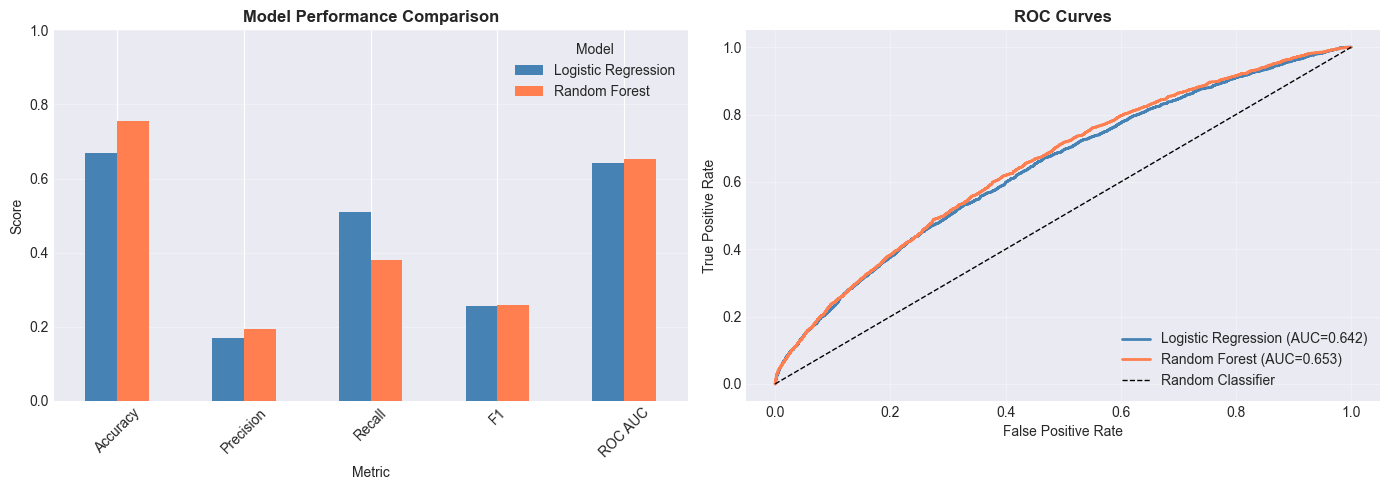

In [46]:
print("MODEL COMPARISON")
comparison_df = pd.DataFrame(results).T
print(" Detailed Metrics Comparison:")
print(comparison_df.round(4))
best_model_name = comparison_df['roc_auc'].idxmax()
print(f"\n Best model (by ROC AUC): {best_model_name}")
print(f"  ROC AUC Score: {comparison_df.loc[best_model_name, 'roc_auc']:.4f}")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
metrics_to_plot = ['test_accuracy', 'precision', 'recall', 'f1', 'roc_auc']
comparison_df[metrics_to_plot].T.plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
axes[0].set_title('Model Performance Comparison', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Metric')
axes[0].set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'], rotation=45)
axes[0].legend(title='Model')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba_test)
axes[1].plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={lr_metrics["roc_auc"]:.3f})',linewidth=2, color='steelblue')
axes[1].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={rf_metrics["roc_auc"]:.3f})',linewidth=2, color='coral')
axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves', fontweight='bold', fontsize=12)
axes[1].legend(loc='lower right')
axes[1].grid(alpha=0.3)
plt.tight_layout()
plt.savefig('visualizations/07_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

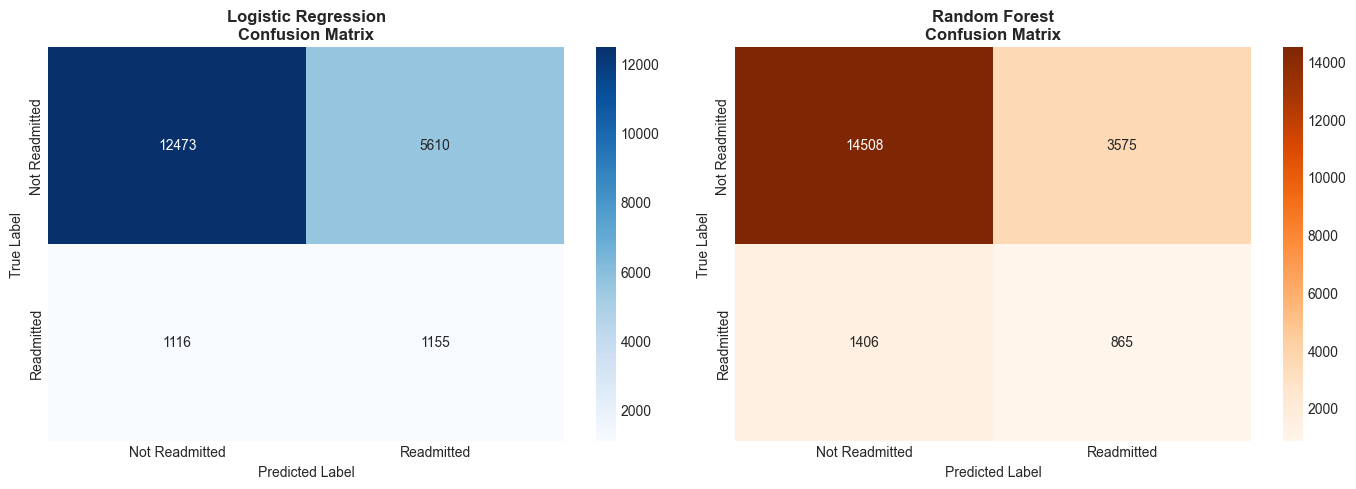

In [47]:
# Select best model for detailed analysis
best_model = models[best_model_name]
if best_model_name == 'Logistic Regression':
    best_pred = lr_pred_test
    best_proba = lr_pred_proba_test
else:
    best_pred = rf_pred_test
    best_proba = rf_pred_proba_test

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Logistic Regression confusion matrix
cm_lr = confusion_matrix(y_test, lr_pred_test)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
axes[0].set_title('Logistic Regression\nConfusion Matrix', fontweight='bold')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')
# Random Forest confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred_test)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', ax=axes[1],
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
axes[1].set_title('Random Forest\nConfusion Matrix', fontweight='bold')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('visualizations/08_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

In [48]:
print(f"\n{best_model_name} - Detailed Classification Report:")
print("-" * 80)
print(classification_report(y_test, best_pred, target_names=['Not Readmitted', 'Readmitted']))


Random Forest - Detailed Classification Report:
--------------------------------------------------------------------------------
                precision    recall  f1-score   support

Not Readmitted       0.91      0.80      0.85     18083
    Readmitted       0.19      0.38      0.26      2271

      accuracy                           0.76     20354
     macro avg       0.55      0.59      0.56     20354
  weighted avg       0.83      0.76      0.79     20354



FEATURE IMPORTANCE ANALYSIS
Top 15 Most Important Features:
           feature  importance
  number_inpatient    0.186059
num_lab_procedures    0.125496
   num_medications    0.103541
  time_in_hospital    0.076279
   diag_1_category    0.066195
       age_numeric    0.060857
   diag_2_category    0.056422
  number_diagnoses    0.054827
   diag_3_category    0.053303
    num_procedures    0.047977
           insulin    0.031280
  number_emergency    0.028120
              race    0.021943
 number_outpatient    0.021789
            gender    0.021444


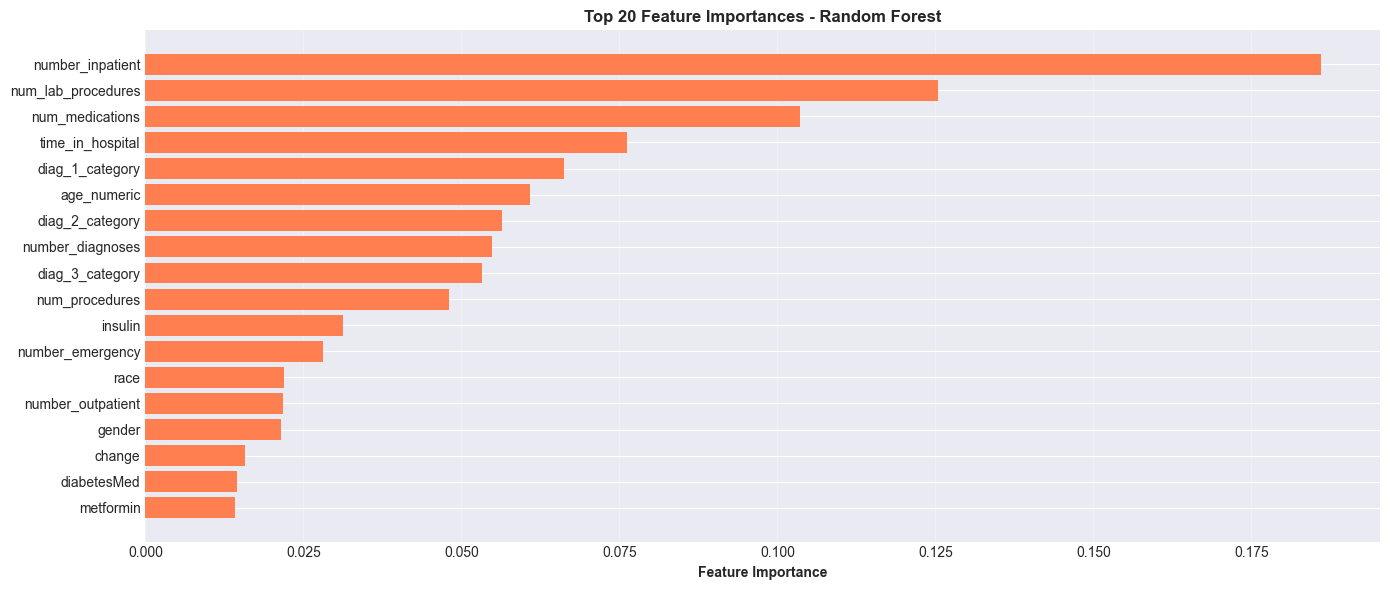

In [49]:
print("FEATURE IMPORTANCE ANALYSIS")
if best_model_name == 'Random Forest':
    # Get feature importances from Random Forest
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    print("Top 15 Most Important Features:")
    print(feature_importance.head(15).to_string(index=False))
    
    plt.figure(figsize=(14, 6))
    top_features = feature_importance.head(20)
    plt.barh(range(len(top_features)), top_features['importance'], color='coral')
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance', fontweight='bold')
    plt.title('Top 20 Feature Importances - Random Forest', fontweight='bold', fontsize=12)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('visualizations/09_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    feature_coef = pd.DataFrame({
        'feature': X_train_scaled.columns,
        'coefficient': lr_model.coef_[0]
    }).sort_values('coefficient', key=abs, ascending=False)
    print("Top 15 Features by Coefficient Magnitude:")
    print(feature_coef.head(15).to_string(index=False))
    plt.figure(figsize=(14, 8))
    top_features = feature_coef.head(20)
    colors = ['red' if x < 0 else 'green' for x in top_features['coefficient']]
    plt.barh(range(len(top_features)), top_features['coefficient'], color=colors, alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Coefficient Value', fontweight='bold')
    plt.title('Top 20 Features by Coefficient - Logistic Regression', fontweight='bold', fontsize=14)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('visualizations/09_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

PREDICTION PROBABILITY DISTRIBUTION


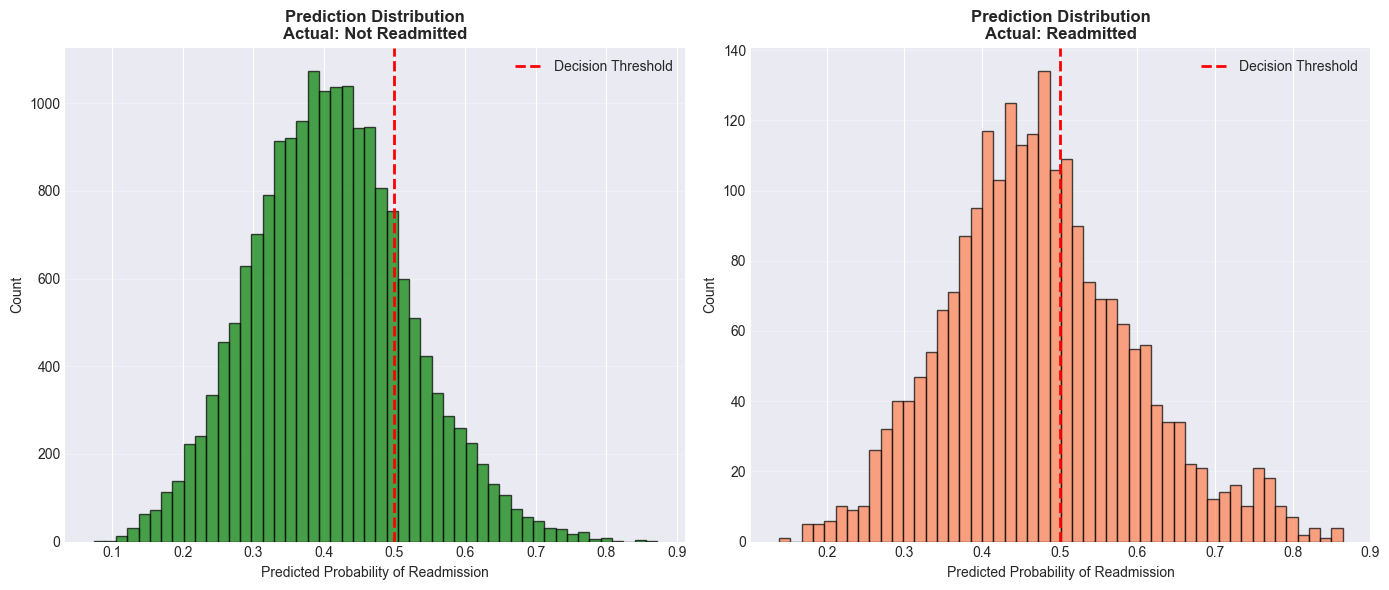

In [50]:
print("PREDICTION PROBABILITY DISTRIBUTION")

# Analyze how confident the model is in its predictions
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
not_readmit_probs = best_proba[y_test == 0]
plt.hist(not_readmit_probs, bins=50, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Predicted Probability of Readmission')
plt.ylabel('Count')
plt.title('Prediction Distribution\nActual: Not Readmitted', fontweight='bold')
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.subplot(1, 2, 2)
readmit_probs = best_proba[y_test == 1]
plt.hist(readmit_probs, bins=50, alpha=0.7, color='coral', edgecolor='black')
plt.xlabel('Predicted Probability of Readmission')
plt.ylabel('Count')
plt.title('Prediction Distribution\nActual: Readmitted', fontweight='bold')
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('visualizations/10_probability_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [51]:
print("BUSINESS IMPACT ANALYSIS")
cm = confusion_matrix(y_test, best_pred)
tn, fp, fn, tp = cm.ravel()
print(f"Confusion Matrix Breakdown:")
print(f"  - True Negatives (TN): {tn:,} - Correctly predicted no readmission")
print(f"  - False Positives (FP): {fp:,} - Incorrectly predicted readmission")
print(f"  - False Negatives (FN): {fn:,} - Missed readmissions (⚠ High cost)")
print(f"  - True Positives (TP): {tp:,} - Correctly predicted readmissions")
# Calculate business metrics
total_readmissions = tp + fn
total_predictions = tn + fp + fn + tp
print(f"\nBusiness Metrics:")
print(f"  - Total actual readmissions: {total_readmissions:,}")
print(f"  - Readmissions caught by model: {tp:,} ({tp/total_readmissions*100:.1f}%)")
print(f"  - Readmissions missed by model: {fn:,} ({fn/total_readmissions*100:.1f}%)")
# Cost-benefit analysis (example costs)
cost_readmission = 15000  # Average cost of a readmission
cost_intervention = 1000  # Cost of preventive intervention
savings_per_prevented = cost_readmission * 0.7  # Assume 70% effectiveness
# Calculate potential savings
prevented_readmissions = tp * 0.7  # Assume 70% of TP can be prevented
intervention_cost = (tp + fp) * cost_intervention
readmission_cost_saved = prevented_readmissions * cost_readmission
net_benefit = readmission_cost_saved - intervention_cost
print(f"\nCost-Benefit Analysis (Hypothetical):")
print(f"  - Patients flagged for intervention: {tp + fp:,}")
print(f"  - Cost of interventions: ${intervention_cost:,.0f}")
print(f"  - Estimated readmissions prevented: {prevented_readmissions:.0f}")
print(f"  - Estimated cost savings: ${readmission_cost_saved:,.0f}")
print(f"  - Net benefit: ${net_benefit:,.0f}")

if net_benefit > 0:
    print(f"\n Model provides positive ROI: ${net_benefit:,.0f} net savings")
else:
    print(f"\n Model needs improvement for positive ROI")

BUSINESS IMPACT ANALYSIS
Confusion Matrix Breakdown:
  - True Negatives (TN): 14,508 - Correctly predicted no readmission
  - False Positives (FP): 3,575 - Incorrectly predicted readmission
  - False Negatives (FN): 1,406 - Missed readmissions (⚠ High cost)
  - True Positives (TP): 865 - Correctly predicted readmissions

Business Metrics:
  - Total actual readmissions: 2,271
  - Readmissions caught by model: 865 (38.1%)
  - Readmissions missed by model: 1,406 (61.9%)

Cost-Benefit Analysis (Hypothetical):
  - Patients flagged for intervention: 4,440
  - Cost of interventions: $4,440,000
  - Estimated readmissions prevented: 606
  - Estimated cost savings: $9,082,500
  - Net benefit: $4,642,500

 Model provides positive ROI: $4,642,500 net savings


PATIENT RISK STRATIFICATION
Patient Risk Stratification:
                Total Patients  Actual Readmissions  Readmission Rate
Risk Category                                                        
Low Risk                  3070                  149          0.048534
Medium Risk              12844                 1257          0.097867
High Risk                 4175                  755          0.180838
Very High Risk             265                  110          0.415094


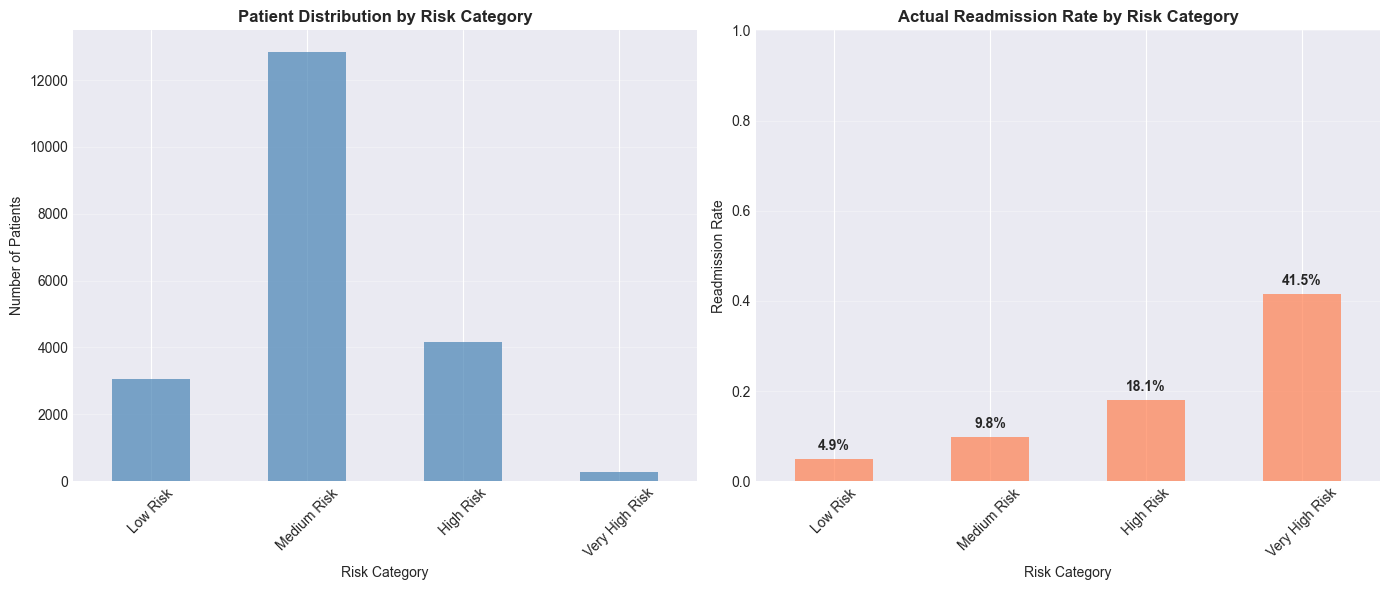

In [52]:
print("PATIENT RISK STRATIFICATION")
# Classify patients into risk categories based on prediction probability
risk_categories = pd.cut(best_proba, bins=[0, 0.3, 0.5, 0.7, 1.0],labels=['Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk'])
risk_summary = pd.DataFrame({
    'Risk Category': risk_categories,
    'Actual Readmission': y_test.values
})
risk_stats = risk_summary.groupby('Risk Category').agg({
    'Actual Readmission': ['count', 'sum', 'mean']
})
risk_stats.columns = ['Total Patients', 'Actual Readmissions', 'Readmission Rate']

print("Patient Risk Stratification:")
print(risk_stats.to_string())
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
risk_stats['Total Patients'].plot(kind='bar', color='steelblue', alpha=0.7)
plt.title('Patient Distribution by Risk Category', fontweight='bold')
plt.xlabel('Risk Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.subplot(1, 2, 2)
risk_stats['Readmission Rate'].plot(kind='bar', color='coral', alpha=0.7)
plt.title('Actual Readmission Rate by Risk Category', fontweight='bold')
plt.xlabel('Risk Category')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(risk_stats['Readmission Rate']):
    plt.text(i, v + 0.02, f'{v*100:.1f}%', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('visualizations/11_risk_stratification.png', dpi=300, bbox_inches='tight')
plt.show()

# SECTION 10: EXECUTIVE SUMMARY AND REPORTING

In [53]:
print("EXECUTIVE SUMMARY GENERATION")
summary_report = f"""
{'='*80}
HEALTHCARE READMISSION PREDICTION - EXECUTIVE SUMMARY
{'='*80}
PROJECT OVERVIEW
{'-'*80}
Objective: Predict 30-day hospital readmissions for diabetes patients
Dataset: Diabetes 130-US Hospitals (1999-2008)
Total Records: {len(df):,}
Analysis Period: Complete end-to-end analytics pipeline

KEY FINDINGS
{'-'*80}
1. READMISSION STATISTICS
   - Overall 30-day readmission rate: {readmission_rate:.2f}%
   - Total readmissions in dataset: {readmitted_30:,}
   - Patient population: Primarily elderly (median age {df['age_numeric'].median():.0f} years)

2. RISK FACTORS IDENTIFIED
   - Prior inpatient admissions: Strong predictor of readmission
   - Emergency department utilization: Higher visits correlate with readmission
   - Diagnosis category: Circulatory and respiratory conditions show elevated risk
   - Age: Elderly patients (70+) have higher readmission rates

3. MODEL PERFORMANCE
   - Best Model: {best_model_name}
   - Test Accuracy: {results[best_model_name]['test_accuracy']:.2%}
   - Precision: {results[best_model_name]['precision']:.2%}
   - Recall: {results[best_model_name]['recall']:.2%}
   - F1 Score: {results[best_model_name]['f1']:.2%}
   - ROC AUC: {results[best_model_name]['roc_auc']:.4f}

CONFUSION MATRIX ANALYSIS
{'-'*80}
   True Negatives: {tn:,} - Correct low-risk predictions
   False Positives: {fp:,} - Unnecessary interventions
   False Negatives: {fn:,} - Missed readmissions (critical)
   True Positives: {tp:,} - Successful high-risk identification

   Model captures {tp/total_readmissions*100:.1f}% of actual readmissions

BUSINESS IMPACT (HYPOTHETICAL SCENARIO)
{'-'*80}
   Assumptions:
   - Average readmission cost: ${cost_readmission:,}
   - Intervention cost per patient: ${cost_intervention:,}
   - Intervention effectiveness: 70%

   Projected Outcomes:
   - Patients requiring intervention: {tp + fp:,}
   - Estimated readmissions prevented: {prevented_readmissions:.0f}
   - Total intervention cost: ${intervention_cost:,.0f}
   - Potential cost savings: ${readmission_cost_saved:,.0f}
   - Net benefit: ${net_benefit:,.0f}

PATIENT RISK STRATIFICATION
{'-'*80}
"""

# Add risk stratification details
for risk_level in risk_stats.index:
    count = risk_stats.loc[risk_level, 'Total Patients']
    rate = risk_stats.loc[risk_level, 'Readmission Rate']
    summary_report += f"   {risk_level}: {count:.0f} patients ({rate*100:.1f}% readmission rate)\n"

summary_report += f"""

RECOMMENDATIONS
{'-'*80}
1. IMMEDIATE ACTIONS
   - Implement risk scoring at discharge for all diabetes patients
   - Target intensive case management for Very High Risk patients
   - Enhance discharge planning protocols

2. RESOURCE ALLOCATION
   - Prioritize follow-up appointments for High/Very High Risk patients
   - Allocate transitional care resources based on risk scores
   - Consider home health services for highest-risk patients

3. CLINICAL INTERVENTIONS
   - Medication reconciliation at discharge
   - Patient education on diabetes self-management
   - Early post-discharge phone calls for high-risk patients

4. MODEL DEPLOYMENT
   - Integrate model into electronic health record (EHR) system
   - Provide real-time risk scores to care teams
   - Monitor model performance with ongoing validation

5. CONTINUOUS IMPROVEMENT
   - Collect feedback from care coordinators
   - Retrain model quarterly with new data
   - A/B test intervention strategies

LIMITATIONS AND CONSIDERATIONS
{'-'*80}
- Model trained on historical data (1999-2008); may need updating
- Class imbalance affects prediction thresholds
- External validation needed before clinical deployment
- Socioeconomic factors not included in current model
- Missing data in weight and specialty fields limits some analyses

TECHNICAL SPECIFICATIONS
{'-'*80}
- Programming Language: Python 3.x
- Key Libraries: pandas, scikit-learn, matplotlib, seaborn
- Model Type: {best_model_name}
- Features Used: {len(model_features)} clinical and demographic variables
- Training Data: {len(X_train):,} records
- Test Data: {len(X_test):,} records
- Cross-validation: Stratified train-test split (80/20)

NEXT STEPS
{'-'*80}
1. Present findings to clinical leadership
2. Obtain approval for pilot implementation
3. Integrate model with EHR system
4. Train care coordinators on risk scores
5. Establish monitoring and evaluation framework
6. Plan for model updates and maintenance

{'='*80}
END OF EXECUTIVE SUMMARY
{'='*80}
"""

EXECUTIVE SUMMARY GENERATION


In [54]:
print(summary_report)
with open('EXECUTIVE_SUMMARY.txt', 'w') as f:
    f.write(summary_report)


HEALTHCARE READMISSION PREDICTION - EXECUTIVE SUMMARY
PROJECT OVERVIEW
--------------------------------------------------------------------------------
Objective: Predict 30-day hospital readmissions for diabetes patients
Dataset: Diabetes 130-US Hospitals (1999-2008)
Total Records: 101,766
Analysis Period: Complete end-to-end analytics pipeline

KEY FINDINGS
--------------------------------------------------------------------------------
1. READMISSION STATISTICS
   - Overall 30-day readmission rate: 11.16%
   - Total readmissions in dataset: 11,357
   - Patient population: Primarily elderly (median age 65 years)

2. RISK FACTORS IDENTIFIED
   - Prior inpatient admissions: Strong predictor of readmission
   - Emergency department utilization: Higher visits correlate with readmission
   - Diagnosis category: Circulatory and respiratory conditions show elevated risk
   - Age: Elderly patients (70+) have higher readmission rates

3. MODEL PERFORMANCE
   - Best Model: Random Forest
   - 

# SECTION 11: FINAL DASHBOARD VISUALIZATION

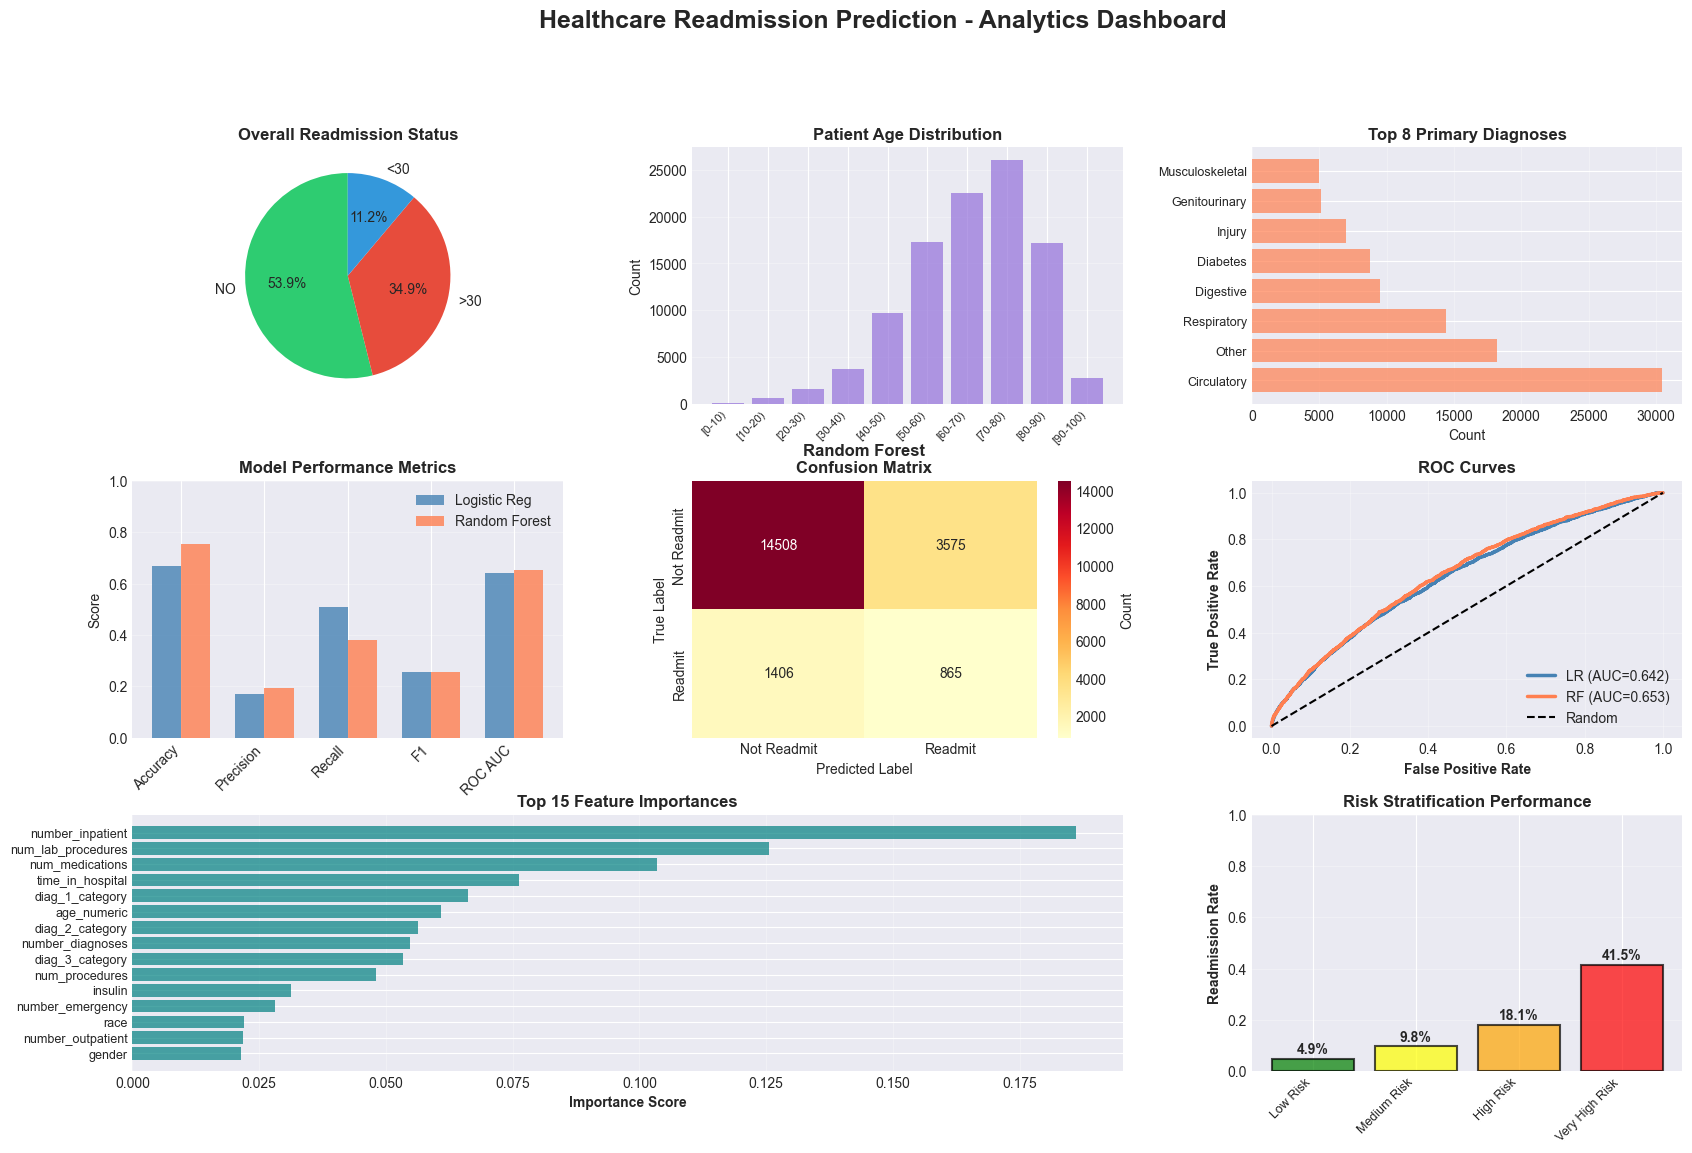


 Final dashboard created successfully!


In [55]:
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
readmit_counts = df['readmitted'].value_counts()
colors_pie = ['#2ecc71', '#e74c3c', '#3498db']
ax1.pie(readmit_counts.values, labels=readmit_counts.index, autopct='%1.1f%%',
        colors=colors_pie, startangle=90)
ax1.set_title('Overall Readmission Status', fontweight='bold', fontsize=12)

# 2. Age Distribution
ax2 = fig.add_subplot(gs[0, 1])
age_order = sorted(df['age'].unique())
age_data = df['age'].value_counts().reindex(age_order)
ax2.bar(range(len(age_data)), age_data.values, color='mediumpurple', alpha=0.7)
ax2.set_xticks(range(len(age_data)))
ax2.set_xticklabels(age_data.index, rotation=45, ha='right', fontsize=8)
ax2.set_title('Patient Age Distribution', fontweight='bold', fontsize=12)
ax2.set_ylabel('Count')
ax2.grid(axis='y', alpha=0.3)

# 3. Top Diagnoses
ax3 = fig.add_subplot(gs[0, 2])
if 'diag_1_category' in df.columns:
    top_diag = df['diag_1_category'].value_counts().head(8)
    ax3.barh(range(len(top_diag)), top_diag.values, color='coral', alpha=0.7)
    ax3.set_yticks(range(len(top_diag)))
    ax3.set_yticklabels(top_diag.index, fontsize=9)
    ax3.set_title('Top 8 Primary Diagnoses', fontweight='bold', fontsize=12)
    ax3.set_xlabel('Count')
    ax3.grid(axis='x', alpha=0.3)

# 4. Model Performance Comparison
ax4 = fig.add_subplot(gs[1, 0])
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
lr_scores = [lr_metrics['test_accuracy'], lr_metrics['precision'], 
             lr_metrics['recall'], lr_metrics['f1'], lr_metrics['roc_auc']]
rf_scores = [rf_metrics['test_accuracy'], rf_metrics['precision'],
             rf_metrics['recall'], rf_metrics['f1'], rf_metrics['roc_auc']]

x = np.arange(len(metrics))
width = 0.35
ax4.bar(x - width/2, lr_scores, width, label='Logistic Reg', color='steelblue', alpha=0.8)
ax4.bar(x + width/2, rf_scores, width, label='Random Forest', color='coral', alpha=0.8)
ax4.set_ylabel('Score')
ax4.set_title('Model Performance Metrics', fontweight='bold', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels(metrics, rotation=45, ha='right')
ax4.legend()
ax4.set_ylim([0, 1])
ax4.grid(axis='y', alpha=0.3)

# 5. Confusion Matrix (Best Model)
ax5 = fig.add_subplot(gs[1, 1])
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', ax=ax5,
            xticklabels=['Not Readmit', 'Readmit'],
            yticklabels=['Not Readmit', 'Readmit'],
            cbar_kws={'label': 'Count'})
ax5.set_title(f'{best_model_name}\nConfusion Matrix', fontweight='bold', fontsize=12)
ax5.set_ylabel('True Label')
ax5.set_xlabel('Predicted Label')

# 6. ROC Curve
ax6 = fig.add_subplot(gs[1, 2])
ax6.plot(fpr_lr, tpr_lr, label=f'LR (AUC={lr_metrics["roc_auc"]:.3f})',
         linewidth=2.5, color='steelblue')
ax6.plot(fpr_rf, tpr_rf, label=f'RF (AUC={rf_metrics["roc_auc"]:.3f})',
         linewidth=2.5, color='coral')
ax6.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random')
ax6.set_xlabel('False Positive Rate', fontweight='bold')
ax6.set_ylabel('True Positive Rate', fontweight='bold')
ax6.set_title('ROC Curves', fontweight='bold', fontsize=12)
ax6.legend(loc='lower right')
ax6.grid(alpha=0.3)

# 7. Feature Importance (if Random Forest is best)
ax7 = fig.add_subplot(gs[2, :2])
if best_model_name == 'Random Forest':
    top_15 = feature_importance.head(15)
    ax7.barh(range(len(top_15)), top_15['importance'], color='teal', alpha=0.7)
    ax7.set_yticks(range(len(top_15)))
    ax7.set_yticklabels(top_15['feature'], fontsize=9)
    ax7.set_xlabel('Importance Score', fontweight='bold')
    ax7.set_title('Top 15 Feature Importances', fontweight='bold', fontsize=12)
    ax7.invert_yaxis()
    ax7.grid(axis='x', alpha=0.3)

# 8. Risk Stratification
ax8 = fig.add_subplot(gs[2, 2])
risk_rates = risk_stats['Readmission Rate'].values
risk_labels = risk_stats.index.tolist()
colors_risk = ['green', 'yellow', 'orange', 'red']
bars = ax8.bar(range(len(risk_rates)), risk_rates, color=colors_risk, alpha=0.7,
               edgecolor='black', linewidth=1.5)
ax8.set_xticks(range(len(risk_rates)))
ax8.set_xticklabels(risk_labels, rotation=45, ha='right', fontsize=9)
ax8.set_ylabel('Readmission Rate', fontweight='bold')
ax8.set_title('Risk Stratification Performance', fontweight='bold', fontsize=12)
ax8.set_ylim([0, 1])
ax8.grid(axis='y', alpha=0.3)

# Add percentage labels
for i, v in enumerate(risk_rates):
    ax8.text(i, v + 0.02, f'{v*100:.1f}%', ha='center', fontweight='bold')

fig.suptitle('Healthcare Readmission Prediction - Analytics Dashboard', 
             fontsize=18, fontweight='bold', y=0.995)
plt.savefig('visualizations/12_FINAL_DASHBOARD.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n Final dashboard created successfully!")

In [56]:
print("DATA PROCESSING SUMMARY")
print(f"Original dataset size: {len(df_raw):,} rows × {df_raw.shape[1]} columns")
print(f"Cleaned dataset size: {len(df):,} rows × {df.shape[1]} columns")
print(f"Features engineered: {df.shape[1] - df_raw.shape[1]} new features created")
print(f"Missing values handled: Yes")
print(f"Categorical encoding: {len(categorical_cols)} features encoded")

DATA PROCESSING SUMMARY
Original dataset size: 101,766 rows × 50 columns
Cleaned dataset size: 101,766 rows × 50 columns
Features engineered: 0 new features created
Missing values handled: Yes
Categorical encoding: 9 features encoded


In [57]:
print("ANALYSIS SUMMARY")
print("-" * 80)
print(f"Target variable: 30-day readmission (binary)")
print(f"Readmission rate: {readmission_rate:.2f}%")
print(f"Total patients analyzed: {len(df):,}")
print(f"Readmitted patients: {readmitted_30:,}")
print(f"Not readmitted patients: {len(df) - readmitted_30:,}")

ANALYSIS SUMMARY
--------------------------------------------------------------------------------
Target variable: 30-day readmission (binary)
Readmission rate: 11.16%
Total patients analyzed: 101,766
Readmitted patients: 11,357
Not readmitted patients: 90,409


In [58]:
print("MODEL TRAINING SUMMARY")
print(f"Models trained: {len(models)}")
print(f"  1. Logistic Regression")
print(f"  2. Random Forest Classifier")
print(f"\nBest performing model: {best_model_name}")
print(f"  - ROC AUC: {results[best_model_name]['roc_auc']:.4f}")
print(f"  - Accuracy: {results[best_model_name]['test_accuracy']:.4f}")
print(f"  - Precision: {results[best_model_name]['precision']:.4f}")
print(f"  - Recall: {results[best_model_name]['recall']:.4f}")

MODEL TRAINING SUMMARY
Models trained: 2
  1. Logistic Regression
  2. Random Forest Classifier

Best performing model: Random Forest
  - ROC AUC: 0.6529
  - Accuracy: 0.7553
  - Precision: 0.1948
  - Recall: 0.3809
